In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


hyl = pd.read_excel('../DataSets/Healthy Life Years.xlsx', sheet_name='Sheet 1',  skiprows = 9,  nrows= 34, usecols = 'A:AI')

C:\Users\Diogo\AppData\Local\Temp\ipykernel_22024\3568340972.py:6: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  hyl = pd.read_excel('../DataSets/Healthy Life Years.xlsx', sheet_name='Sheet 1',  skiprows = 9,  nrows= 34, usecols = 'A:AI')


In [45]:
unwanted_cols = [col for col in hyl.columns if col.startswith('Unnamed')]
hyl = hyl.drop(unwanted_cols, axis=1)

In [46]:
hyl = hyl[(hyl.TIME == 'European Union - 27 countries (from 2020)') | (hyl.TIME == 'Portugal')]

In [47]:
hyl.loc[hyl.TIME == 'European Union - 27 countries (from 2020)', 'TIME'] = 'Europe'
hyl = hyl.rename(columns={'TIME': 'Region'})
hyl = hyl.drop('2011', axis=1)

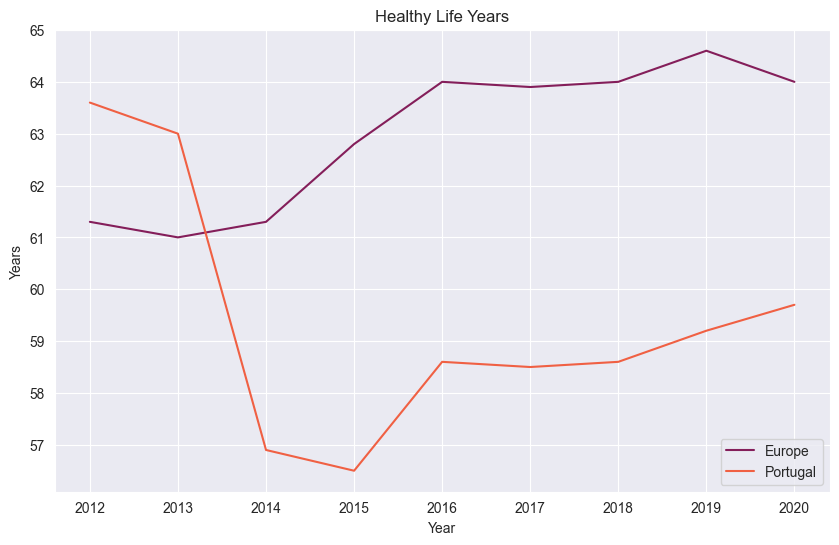

In [58]:
# Melt the DataFrame to convert the years into a single 'Year' column
hyl_melted = pd.melt(hyl, id_vars='Region', var_name='Year', value_name='Value')

# Create the line plot
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=hyl_melted, x='Year', y='Value', hue='Region', palette='rocket')
title = plt.title('Healthy Life Years')
plt.xlabel('Year')
plt.ylabel('Years')
plt.legend(loc='lower right')
plt.savefig(f'../Graphics/{title.get_text()}.png', transparent=True, dpi=800,bbox_inches='tight')
plt.show()